In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
pwd


'/content'

In [3]:
cd drive/MyDrive/

/content/drive/MyDrive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
#ucitavanja dataseta
df=pd.read_csv('multiclass_data.csv', header=None)

In [6]:
#mixing data
df=df.iloc[np.random.permutation(len(df))]
#razdvojomo data set na input and output
X_dataset=df.iloc[:,:5]
Y_dataset=df.iloc[:,5:]
X_dataset=np.array(X_dataset)
Y_dataset=np.array(Y_dataset)

In [7]:
#standardizacija
#X_data=(X_dataset - X_dataset.mean())/X_dataset.std(ddof=0)
srvr = np.zeros(X_dataset.shape[1])
stdev = np.zeros(X_dataset.shape[1])
for i in range(X_dataset.shape[1]):
    srvr[i] = np.mean(X_dataset[:, i])
    stdev[i] = np.std(X_dataset[:, i])

for i in range(X_dataset.shape[1]):
    for j in range(X_dataset.shape[0]):
        X_dataset[j][i] = ((X_dataset[j][i]) - srvr[i]) / stdev[i]

In [8]:
#dodavanje za teta0
one_mat=np.mat(np.ones(X_dataset.shape[0]))
X=np.hstack((one_mat.T,X_dataset))
X.shape

(178, 6)

In [9]:
from sklearn.model_selection import train_test_split
#podela na train i test dataset
X_train, X_test, Y_train, Y_test=train_test_split(X,Y_dataset)


print(type(X_train),type(X_test),type(Y_train),type(Y_test))

<class 'numpy.matrix'> <class 'numpy.matrix'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [10]:
#learnig rate and bach size 
alfa=np.array([0.01,0.1,1])
mmb=np.array([5,10,25])
epoha_size=50


Za stopu ucenja 0.01 i za broj mini sarze 5, tacnost na testnom skupu je 100.0


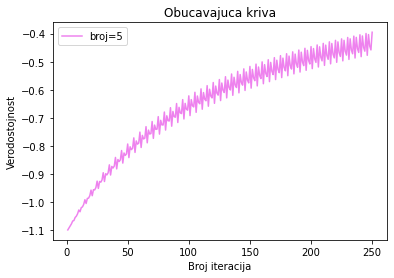

Za stopu ucenja 0.01 i za broj mini sarze 10, tacnost na testnom skupu je 95.55555555555556


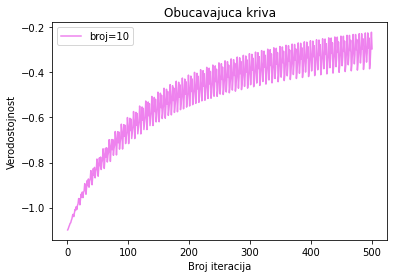

Za stopu ucenja 0.01 i za broj mini sarze 25, tacnost na testnom skupu je 95.55555555555556


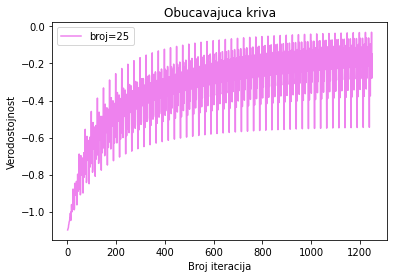

Za stopu ucenja 0.1 i za broj mini sarze 5, tacnost na testnom skupu je 95.55555555555556


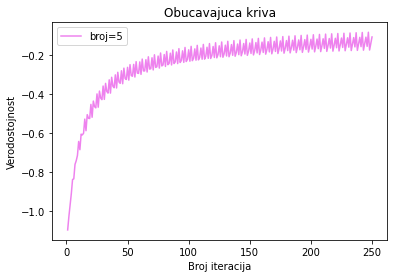

Za stopu ucenja 0.1 i za broj mini sarze 10, tacnost na testnom skupu je 95.55555555555556


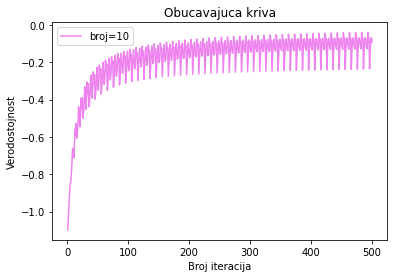

Za stopu ucenja 0.1 i za broj mini sarze 25, tacnost na testnom skupu je 93.33333333333333


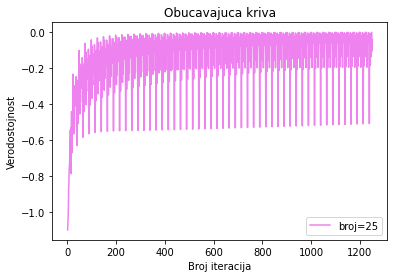

Za stopu ucenja 1.0 i za broj mini sarze 5, tacnost na testnom skupu je 95.55555555555556


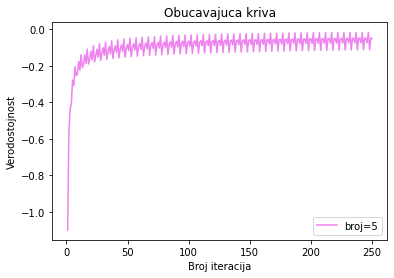

Za stopu ucenja 1.0 i za broj mini sarze 10, tacnost na testnom skupu je 95.55555555555556


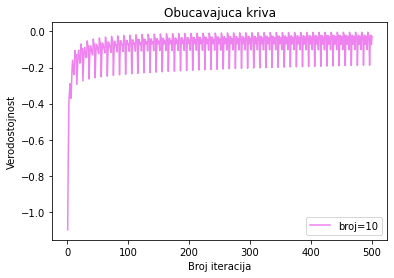

Za stopu ucenja 1.0 i za broj mini sarze 25, tacnost na testnom skupu je 95.55555555555556


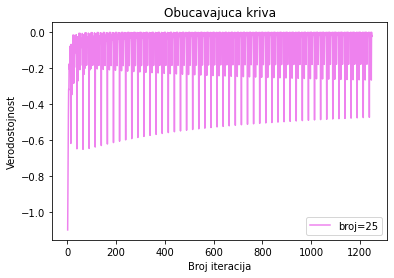

In [13]:
for lr in alfa:
  for bach in mmb:
    teta=np.zeros((X_train.shape[1], 3)) #teta je sa tri kolone jer imamo 3 klase [0,1,2]
    J_bach=np.zeros((epoha_size*bach))
    index=int(X_train.shape[0]/bach) #velicina svakog datasata jednog bacha koji ima [5,10,25]
    index_J=0
    for epoha in range(epoha_size):
        
        for i in range(bach):
            J=0
            if i != bach-1:
              X_bach=X_train[index*i:index*(i+1)] #spliting data to fit bach size 
              Y_bach=Y_train[index*i:index*(i+1)]
          
            else:
              X_bach=X_train[i*index:]
              Y_bach=Y_train[i*index:]

            grad=np.zeros((X_train.shape[1], 3)) 
            m=X_bach.shape[0]
            
            for j in range(X_bach.shape[0]):
                suma = np.exp(np.dot(X_bach[j, :], teta))
                suma = suma.T
                a=int(Y_bach[j])
                J = J + (1/m)*(np.dot(X_bach[j] , teta[:, a])-np.log(np.sum(suma)))        
                grad=grad_(grad,X_bach,j,Y_bach,suma)

            grad = grad/(X_bach.shape[0])
            J_bach[index_J] = J
            index_J = index_J+1      
              # proračun gradijentnog uspona
              
            teta[:, 0] = teta[:, 0]+lr*grad[:, 0]
            teta[:, 1] = teta[:, 1]+lr*grad[:, 1] # teta k=3 se ne ažurira i ostaje nula
    rez = tacnost(X_test,Y_test,teta)
    print(f"Za stopu ucenja {lr} i za broj mini sarze {bach}, tacnost na testnom skupu je {rez}")
    plt.figure()    
    plt.title("Obucavajuca kriva")
    plt.xlabel("Broj iteracija")
    plt.ylabel("Verodostojnost")
    plt.plot(np.arange(1,bach*epoha_size+1), J_bach, label="broj="+str(bach) , color="violet")
    plt.legend(loc="best")
    plt.show()   

    

In [11]:
def grad_(grad,X_bach,j,Y_bach,suma): 
   
    if (Y_bach[j] == 0):
      grad[:,0] = grad[:,0] + (1-suma[0]/np.sum(suma))*X_bach[j,:]
      grad[:,1] = grad[:,1] + (0-suma[1]/np.sum(suma))*X_bach[j,:]
    elif(Y_bach[j] == 1):
      grad[:,0] = grad[:,0] + (0-suma[0]/np.sum(suma))*X_bach[j,:]
      grad[:,1] = grad[:,1] + (1-suma[1]/np.sum(suma))*X_bach[j,:]  
    else:
      grad[:,0] = grad[:,0] + (0-suma[0]/np.sum(suma))*X_bach[j,:]
      grad[:,1] = grad[:,1] + (0-suma[1]/np.sum(suma))*X_bach[j,:]
    return grad


  

In [12]:
def tacnost(X_test,Y_test,teta):
    suma=0
    pom=np.exp(np.dot(X_test,teta))#shape(45,3)
    pom2=(np.sum(pom,axis=1)).reshape(pom.shape[0],1) #(45,)
    #(1,45)
   
    fi=pom/pom2 #shape (45,3)
    
    Y_pred=np.zeros((Y_test.shape[0],Y_test.shape[1]))
    Y_test=np.mat(Y_test)
    for i in range(Y_pred.shape[0]):
        Y_pred[i]=np.argmax(fi[i])
    for j in range(X_test.shape[0]):
      if (Y_pred[j] == Y_test[j]):
         suma= suma + 1
    konacno= (suma/Y_test.shape[0])*100  
    return konacno